In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the dataset folder


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


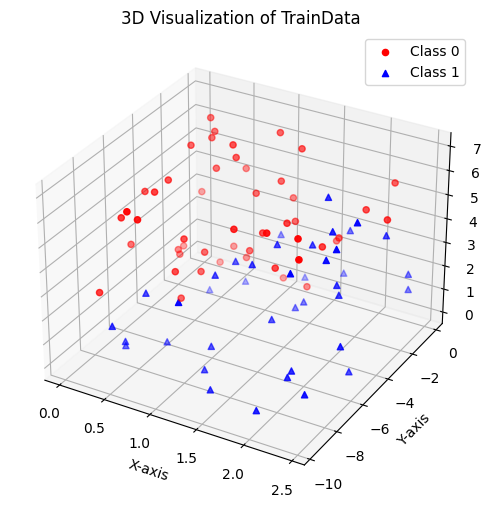

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Load the dataset
data = scipy.io.loadmat('/content/drive/MyDrive/Ex2.mat')

# Extract TrainData and labels
TrainData = data['TrainData']
labels = TrainData[3, :]

# Separate data into two classes based on labels
class_0 = TrainData[:3, labels == 0]
class_1 = TrainData[:3, labels == 1]

# Visualize the 3D data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot points for class 0 in red
ax.scatter(class_0[0, :], class_0[1, :], class_0[2, :], c='r', marker='o', label='Class 0')

# Plot points for class 1 in blue
ax.scatter(class_1[0, :], class_1[1, :], class_1[2, :], c='b', marker='^', label='Class 1')

# Set labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

# Show the plot
plt.title('3D Visualization of TrainData')
plt.show()


In [ ]:
print(data['TrainData'].shape)
print(data['TestData'].shape)


(4, 90)
(3, 90)


In [ ]:
!pip install tensorflow

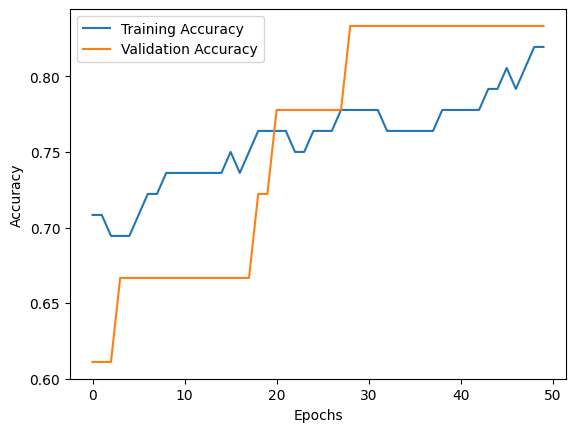

1/1 [==============================] - 0s 30ms/step - loss: 0.3706 - accuracy: 0.8333
Validation Accuracy: 83.33%
3/3 [==============================] - 0s 4ms/step
Predictions on TestData:
[[ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]]


In [ ]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the dataset
# Extract TrainData and labels
TrainData = data['TrainData']
labels = TrainData[3, :]

# Separate features and labels
X = TrainData[:3, :].T  # Transpose to have samples as rows
y = labels.T

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Build the MLP model
model = models.Sequential([
    layers.Dense(20, activation='relu', input_shape=(3,)),
    layers.Dense(1, activation='tanh')  # Assuming classes are -1 and 1
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Make predictions on the test data
TestData = data['TestData'].T
TestData = scaler.transform(TestData)
predictions = model.predict(TestData)

# Threshold the predictions to get binary outputs (assuming classes are -1 and 1)
binary_predictions = np.where(predictions > 0, 1, -1)

# Print predictions
print("Predictions on TestData:")
print(binary_predictions)




In [ ]:
# Separate features and labels
X = TrainData[:3, :].T  # Transpose to have samples as rows
y = labels.T

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize variables to keep track of the best model
best_val_accuracy = 0
best_model = None

# Try different number of neurons in the hidden layer
for num_neurons in range(1,50):
    # Build the MLP model
    model = models.Sequential([
        layers.Dense(num_neurons, activation='relu', input_shape=(3,)),
        layers.Dense(1, activation='tanh')  # Assuming classes are -1 and 1
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_val, y_val)

    # Update best model if the current one has higher validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model

# Print details of the best-designed MLP
print("Best MLP Architecture:")
best_model.summary()

# Print the best validation accuracy
print(f"Best Validation Accuracy: {best_val_accuracy*100:.2f}%")

# Make predictions on the test data using the best model
TestData = data['TestData'].T
TestData = scaler.transform(TestData)
predictions = best_model.predict(TestData)

# Threshold the predictions to get binary outputs (assuming classes are -1 and 1)
binary_predictions = np.where(predictions > 0, 1, -1)

# Print predictions
print("Predictions on TestData:")
print(binary_predictions)

1/1 [==============================] - 0s 28ms/step - loss: 0.4462 - accuracy: 0.8333
Best MLP Architecture:
Model: "sequential_185"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_370 (Dense)           (None, 44)                176       
                                                                 
 dense_371 (Dense)           (None, 1)                 45        
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Best Validation Accuracy: 88.89%
3/3 [==============================] - 0s 6ms/step
Predictions on TestData:
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]]


In [ ]:
import numpy as np
import scipy.io


predictions_transposed=binary_predictions.transpose()
print(predictions_transposed.shape)
print(TestData.shape)
TestData=TestData.T
# Concatenate the arrays along axis 0 to create a 4x90 array
combined_data = np.concatenate((TestData, predictions_transposed), axis=0)

# Alternatively, you can use vstack
combined_data = np.vstack((TestData, predictions_transposed))

# Print the shape of the combined array
print("Shape of combined_data:", combined_data.shape)



(1, 90)
(90, 3)
Shape of combined_data: (4, 90)


In [ ]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models


# Save binary predictions to a .mat file
result_dict = {'binary_predictions': binary_predictions}

# Specify the file path where you want to save the .mat file
output_file_path = '/content/drive/MyDrive/binary_predictions.mat'

# Save the data to a .mat file
scipy.io.savemat(output_file_path, result_dict)

# Print a message indicating the file has been saved
print(f"Binary predictions saved to {output_file_path}")


Binary predictions saved to /content/drive/MyDrive/binary_predictions.mat


# New Section

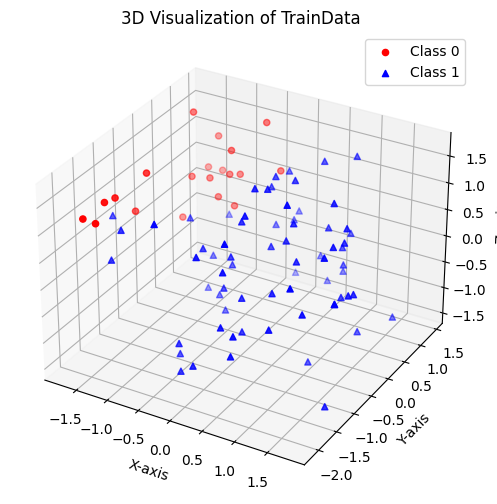

In [ ]:
# Extract TrainData and labels

Nlabels = combined_data[3, :]

# Separate data into two classes based on labels
Nclass_0 = combined_data[:3, Nlabels == -1]
Nclass_1 = combined_data[:3, Nlabels == 1]

# Visualize the 3D data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot points for class 0 in red
ax.scatter(Nclass_0[0, :], Nclass_0[1, :], Nclass_0[2, :], c='r', marker='o', label='Class 0')

# Plot points for class 1 in blue
ax.scatter(Nclass_1[0, :], Nclass_1[1, :], Nclass_1[2, :], c='b', marker='^', label='Class 1')

# Set labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

# Show the plot
plt.title('3D Visualization of TrainData')
plt.show()

Second one

In [ ]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Extract TrainData and labels
TrainData = data['TrainData']
labels = TrainData[3, :]

# Separate features and labels
X = TrainData[:3, :].T  # Transpose to have samples as rows
y = labels.T

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y, num_classes=2)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize variables to keep track of the best model
best_val_accuracy = 0
best_num_neurons = 0
best_model = None

# Try different numbers of neurons in the hidden layer
neurons_list = [5,15,25,32,40,50,64,80,100, 128]

for num_neurons in neurons_list:
    # Build the MLP model
    model = models.Sequential([
        layers.Dense(num_neurons, activation='relu', input_shape=(3,)),
        layers.Dense(2, activation='softmax')  # Output layer with two neurons
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_val, y_val)

    # Update best model if the current one has higher validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_num_neurons = num_neurons
        best_model = model

    # Print accuracy for the current number of neurons
    print(f"Accuracy for {num_neurons} neurons in the hidden layer: {val_accuracy*100:.2f}%")

# Print details of the best-designed MLP
print("\nBest MLP Architecture:")
best_model.summary()

# Print the best validation accuracy and the corresponding number of neurons
print(f"\nBest Validation Accuracy: {best_val_accuracy*100:.2f}%")
print(f"Number of neurons in the hidden layer for the best model: {best_num_neurons}")

# Make predictions on the test data using the best model
TestData = data['TestData'].T
TestData = scaler.transform(TestData)
predictions = best_model.predict(TestData)

# Extract the predicted class labels (assuming the class with higher probability is chosen)
predicted_labels = np.argmax(predictions, axis=1)

# Print predictions
print("\nPredictions on TestData:")
print(predicted_labels)

# Make predictions on the test data using the best model

# Print output of each output neuron for TestData
print("\nOutput of each output neuron for TestData:")
print(predictions)

1/1 [==============================] - 0s 27ms/step - loss: 0.4784 - accuracy: 0.8333
Accuracy for 5 neurons in the hidden layer: 83.33%
1/1 [==============================] - 0s 40ms/step - loss: 0.4687 - accuracy: 0.8889
Accuracy for 15 neurons in the hidden layer: 88.89%
1/1 [==============================] - 0s 27ms/step - loss: 0.3730 - accuracy: 0.8333
Accuracy for 25 neurons in the hidden layer: 83.33%
1/1 [==============================] - 0s 31ms/step - loss: 0.3661 - accuracy: 0.9444
Accuracy for 32 neurons in the hidden layer: 94.44%
1/1 [==============================] - 0s 30ms/step - loss: 0.2923 - accuracy: 0.9444
Accuracy for 40 neurons in the hidden layer: 94.44%
1/1 [==============================] - 0s 28ms/step - loss: 0.2721 - accuracy: 0.9444
Accuracy for 50 neurons in the hidden layer: 94.44%
1/1 [==============================] - 0s 28ms/step - loss: 0.3215 - accuracy: 0.8889
Accuracy for 64 neurons in the hidden layer: 88.89%
1/1 [==============================


Best Validation Accuracy: 94.44%
Number of neurons in the hidden layer for the best model: 32
3/3 [==============================] - 0s 4ms/step

Predictions on TestData:
[1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0]

Output of each output neuron for TestData:
[[0.42401    0.5759899 ]
 [0.71066123 0.28933883]
 [0.5873106  0.41268945]
 [0.8249571  0.17504293]
 [0.9061471  0.09385286]
 [0.15222089 0.8477791 ]
 [0.3895864  0.61041355]
 [0.14311182 0.8568882 ]
 [0.18524072 0.8147592 ]
 [0.7172859  0.2827142 ]
 [0.3161278  0.6838722 ]
 [0.97831064 0.02168937]
 [0.11488686 0.885113  ]
 [0.49901655 0.50098336]
 [0.8689185  0.13108145]
 [0.5950565  0.40494353]
 [0.07282968 0.9271703 ]
 [0.8703117  0.12968834]
 [0.93812    0.06188003]
 [0.5933331  0.4066668 ]
 [0.279779   0.72022104]
 [0.27200985 0.72799015]
 [0.930612   0.06938789]
 [0.19592334 0.8040766 ]


In [ ]:
# Save binary predictions to a .mat file
result_dict = {'Testlabel_b': predicted_labels}

# Specify the file path where you want to save the .mat file
output_file_path = '/content/drive/MyDrive/Testlabel_b.mat'

# Save the data to a .mat file
scipy.io.savemat(output_file_path, result_dict)

# Print a message indicating the file has been saved
print(f"Binary predictions saved to {output_file_path}")

Binary predictions saved to /content/drive/MyDrive/Testlabel_b.mat


In [ ]:
# Save binary predictions to a .mat file
result_dict = {'probabilities': predictions}

# Specify the file path where you want to save the .mat file
output_file_path = '/content/drive/MyDrive/probabilities.mat'

# Save the data to a .mat file
scipy.io.savemat(output_file_path, result_dict)

# Print a message indicating the file has been saved
print(f"Binary predictions saved to {output_file_path}")

Binary predictions saved to /content/drive/MyDrive/probabilities.mat
